In [ ]:
from IPython.display import display
import ipywidgets as widgets

# Variable que deseas mostrar
variable_x = 10

# Crear el widget de la tarjeta
card_widget = widgets.HTML(value=f'<div style="border: 1px solid black; padding: 10px; width: 200px; text-align: center;">Variable X: {variable_x}</div>')

# Mostrar el widget
display(card_widget)


HTML(value='<div style="border: 1px solid black; padding: 10px; width: 200px; text-align: center;">Variable X:…

In [ ]:
# Paso 1 = Librerías y cargado de datos

# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Carga de DataSet

from google.colab import files
uploaded= files.upload()
for fn in uploaded.keys():
  name = fn

df_weather = pd.read_csv(name, sep=";")

df_weather

Saving w.csv to w.csv


<ipython-input-1-9f5804353ebf>:21: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_weather = pd.read_csv(name, sep=";")


,Date,Location,GeoLocation,RegZone,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,Este de Australia.,Nueva Gales del Sur,13.4,22.9,0.6,NaN,NaN,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,Este de Australia.,Nueva Gales del Sur,7.4,25.1,0.0,NaN,NaN,WNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,Este de Australia.,Nueva Gales del Sur,12.9,25.7,0.0,NaN,NaN,WSW,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,Este de Australia.,Nueva Gales del Sur,9.2,28.0,0.0,NaN,NaN,NE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,Este de Australia.,Nueva Gales del Sur,17.5,32.3,1.0,NaN,NaN,W,...,33.0,1010.8,1006,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,Centro de Australia.,Territorio del Norte,3.5,21.8,0.0,NaN,NaN,E,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,Centro de Australia.,Territorio del Norte,2.8,23.4,0.0,NaN,NaN,E,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,Centro de Australia.,Territorio del Norte,3.6,25.3,0.0,NaN,NaN,NNW,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,Centro de Australia.,Territorio del Norte,5.4,26.9,0.0,NaN,NaN,N,...,24.0,1021,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


In [ ]:
# Paso 2
# Creando nuevas columnas y transformando String por float64
d_LluviaMan = { 'No': 0, 'Yes': 1}
df_weather['desc_LluviaMan']=df_weather['RainTomorrow'].map(d_LluviaMan)

d_LluviaHoy = { 'No': 0, 'Yes': 1}
df_weather['desc_LluviaHoy']=df_weather['RainToday'].map(d_LluviaHoy)

# Cambiando el tipo de dato de desc_LLuviaMan a float64
df_weather['desc_LluviaMan'] = df_weather['desc_LluviaMan'].astype(float)

# Creando nuevas columnas para mantener la data original intacta
df_weather['Evaporacion'] = '' # Evaporation [float64]
df_weather['Sol'] = '' # Sunshine [float64]
df_weather['Nub9am'] = '' # Cloud9am [float64]
df_weather['Nub3pm'] = '' # Cloud3pm [float64]
df_weather['Presion9am'] = ''  # Pressure9am [object]
df_weather['Presion3pm'] = ''  # Pressure3pm [object]
df_weather['Lluvia'] = '' # Rainfall [float64] // Ex 'mm'
df_weather['Humedad9am'] = '' # Humidity9am [float64]
df_weather['Humedad3pm'] = '' # Humidity3pm [float64]
df_weather['T9am'] = '' # Temp9am [float64]
df_weather['T3pm'] = '' # Temp3pm [float64]
df_weather['W9am'] = ''  # WindSpeed9am [float64]
df_weather['W3pm'] = '' # WindSpeed3pm [float64]
df_weather['WGS'] = '' # WindGustSpeed [float64]
df_weather['WD9am'] = '' # WindDir9am [object]
df_weather['WD3pm'] = '' # WindDir3pm [object]
df_weather['Riesgo'] = '' # RISK_MM [float64]
df_weather['Minima_temp'] = '' # MinTemp [float64]
df_weather['Max_temp'] = '' # MaxTemp [float64]
df_weather['Dir_viento'] = '' # WindGustDir [object]
df_weather['Mes'] = ''
df_weather['Anio'] = ''


# Copiando data original(data raw) a columnas copia
df_weather['Evaporacion'] = df_weather['Evaporation']
df_weather['Sol'] = df_weather['Sunshine']
df_weather['Nub9am'] = df_weather['Cloud9am']
df_weather['Nub3pm'] = df_weather['Cloud3pm']
df_weather['Presion9am'] = df_weather['Pressure9am']
df_weather['Presion3pm'] = df_weather['Pressure3pm']
df_weather['Lluvia'] = df_weather['Rainfall']
df_weather['Humedad9am'] = df_weather['Humidity9am']
df_weather['Humedad3pm'] = df_weather['Humidity3pm']
df_weather['T9am'] = df_weather['Temp9am']
df_weather['T3pm'] = df_weather['Temp3pm']
df_weather['WGS'] = df_weather['WindGustSpeed']
df_weather['W9am'] = df_weather['WindSpeed9am']
df_weather['W3pm'] = df_weather['WindSpeed3pm']
df_weather['WD9am'] = df_weather['WindDir9am']
df_weather['WD3pm'] = df_weather['WindDir3pm']
df_weather['Riesgo'] = df_weather['RISK_MM']
df_weather['Minima_temp'] = df_weather['MinTemp']
df_weather['Max_temp'] = df_weather['MaxTemp']
df_weather['Dir_viento'] = df_weather['WindGustDir']


# Transformando Presión a tipo numeric
df_weather['Presion9am'] = pd.to_numeric(df_weather['Presion9am'], errors='coerce')
df_weather['Presion3pm'] = pd.to_numeric(df_weather['Presion3pm'], errors='coerce')

# Reemplazando los valores nulos por la moda y el promedio respectivamente en las columnas copia
df_weather['Evaporacion'].fillna(df_weather['Evaporacion'].mean(), inplace=True)
df_weather['Sol'].fillna(df_weather['Sol'].mean(), inplace=True)
df_weather['Nub9am'].fillna(df_weather['Nub9am'].mean(), inplace=True)
df_weather['Nub3pm'].fillna(df_weather['Nub3pm'].mean(), inplace=True)
df_weather['Presion9am'].fillna(df_weather['Presion9am'].mean(), inplace=True)
df_weather['Presion3pm'].fillna(df_weather['Presion3pm'].mean(), inplace=True)
df_weather['desc_LluviaHoy'].fillna(df_weather['desc_LluviaHoy'].mode()[0], inplace=True)
df_weather['Lluvia'].fillna(df_weather['Lluvia'].mean(), inplace=True)
df_weather['Humedad9am'].fillna(df_weather['Humedad9am'].mean(), inplace=True)
df_weather['Humedad3pm'].fillna(df_weather['Humedad3pm'].mean(), inplace=True)
df_weather['T9am'].fillna(df_weather['T9am'].mean(), inplace=True)
df_weather['T3pm'].fillna(df_weather['T3pm'].mean(), inplace=True)
df_weather['WGS'].fillna(df_weather['WGS'].mean(), inplace=True)
df_weather['W9am'].fillna(df_weather['W9am'].mean(), inplace=True)
df_weather['W3pm'].fillna(df_weather['W3pm'].mean(), inplace=True)
df_weather['WD9am'].fillna(df_weather['WD9am'].mode()[0], inplace=True)
df_weather['WD3pm'].fillna(df_weather['WD3pm'].mode()[0], inplace=True)
df_weather['Riesgo'].fillna(df_weather['Riesgo'].mean(), inplace=True)
df_weather['Minima_temp'].fillna(df_weather['Minima_temp'].mean(), inplace=True)
df_weather['Max_temp'].fillna(df_weather['Max_temp'].mean(), inplace=True)
df_weather['Dir_viento'].fillna(df_weather['Dir_viento'].mode()[0], inplace=True)
df_weather['Anio'] = pd.DatetimeIndex(df_weather['Date']).year
df_weather['Mes'] = pd.DatetimeIndex(df_weather['Date']).month


df_weather

"""Paso 2 - Listo"""

'Paso 2 - Listo'

In [ ]:
df

In [ ]:
# Agrupando columnas
columnas = ['Date', 'Location', 'GeoLocation', 'RegZone','Evaporacion', 'Sol',
            'Nub9am', 'Nub3pm', 'Presion9am', 'Presion3pm', 'Lluvia',
            'Humedad9am', 'Humedad3pm', 'T9am', 'T3pm', 'W9am', 'W3pm', 'WGS',
            'WD9am', 'WD3pm', 'Riesgo', 'Minima_temp','Max_temp', 'Dir_viento',
            'Mes', 'Anio', 'desc_LluviaMan', 'desc_LluviaHoy']

# Crear un nuevo DataFrame con las columnas seleccionadas
df_final = df_weather[columnas].copy()


In [ ]:
df_final.shape

(142193, 28)

In [ ]:
df_final.to_csv('df.csv', index=False)


files.download('df.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
nulos = df_final.isnull().sum()

print(nulos)

Date              0
Location          0
GeoLocation       0
RegZone           0
Evaporacion       0
Sol               0
Nub9am            0
Nub3pm            0
Presion9am        0
Presion3pm        0
Lluvia            0
Humedad9am        0
Humedad3pm        0
T9am              0
T3pm              0
W9am              0
W3pm              0
WGS               0
WD9am             0
WD3pm             0
Riesgo            0
Minima_temp       0
Max_temp          0
Dir_viento        0
Mes               0
Anio              0
desc_LluviaMan    0
desc_LluviaHoy    0
dtype: int64


<ipython-input-4-64951d324ff4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_final.corr()


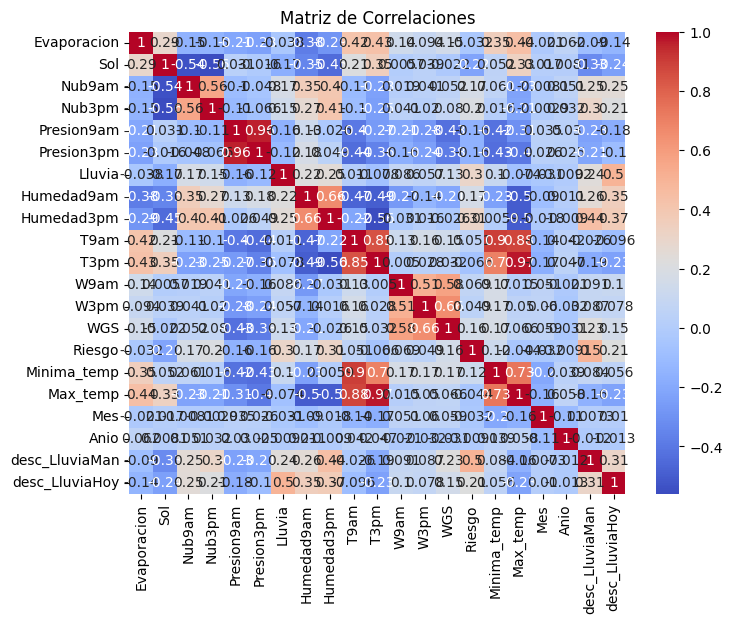

In [ ]:
# Agrupando columnas para la matriz de correlaciones
correlation_matrix = df_final.corr()

# Crear el gráfico de matriz de correlaciones
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlaciones')
plt.show()

In [ ]:
# Busqueda de Correlaciones discriminando negativos
threshold = 0.4  # Umbral de correlación para considerarla alta
correlations_by_variable = {}

# Obtener las correlaciones para cada variable
for i in range(len(correlation_matrix.columns)):
    variable = correlation_matrix.columns[i]
    correlations = []

    for j in range(len(correlation_matrix.columns)):
        if i != j and correlation_matrix.iloc[i, j] > 0 and abs(correlation_matrix.iloc[i, j]) > threshold:
            other_variable = correlation_matrix.columns[j]
            correlation_value = correlation_matrix.iloc[i, j]
            correlations.append((other_variable, correlation_value))

    # Ordenar las correlaciones de mayor a menor
    correlations.sort(key=lambda x: abs(x[1]), reverse=True)

    # Guardar las tres correlaciones más altas
    correlations_by_variable[variable] = correlations[:3]

# Imprimir las correlaciones por variable
for variable, correlations in correlations_by_variable.items():
    print(f"Correlaciones para {variable}:")
    for other_variable, correlation_value in correlations:
        print(f"{other_variable} = {correlation_value}")
    print()

Correlaciones para Evaporacion:
Max_temp = 0.44221430834915154
T3pm = 0.42919504861368246
T9am = 0.4173228483586589

Correlaciones para Sol:

Correlaciones para Nub9am:
Nub3pm = 0.5611834611889184
Humedad3pm = 0.4000055207830313

Correlaciones para Nub3pm:
Nub9am = 0.5611834611889184
Humedad3pm = 0.4078980494613916

Correlaciones para Presion9am:
Presion3pm = 0.958583466620237

Correlaciones para Presion3pm:
Presion9am = 0.958583466620237

Correlaciones para Lluvia:
desc_LluviaHoy = 0.5002861505204207

Correlaciones para Humedad9am:
Humedad3pm = 0.6598522881476225

Correlaciones para Humedad3pm:
Humedad9am = 0.6598522881476225
desc_LluviaMan = 0.43967835747711637
Nub3pm = 0.4078980494613916

Correlaciones para T9am:
Minima_temp = 0.8979990294057514
Max_temp = 0.880086863780863
T3pm = 0.8469311090434608

Correlaciones para T3pm:
Max_temp = 0.9697354405205986
T9am = 0.8469311090434608
Minima_temp = 0.6998284848115117

Correlaciones para W9am:
WGS = 0.5778640322569255
W3pm = 0.51307884935

In [ ]:
# Creación de DF para trabajar.

df_q = df_final.loc[df_weather['RegZone'] == 'Queensland'] # DF Queensland Completo
df_qX = df_q.loc[(df_q['Anio'] >=2010) & (df_q['Anio'] < 2013)] # DF Queensland años 2010 - 2012

# -------------------------------------------------------------------

df_s = df_final.loc[df_final['Location'] == 'Sydney'] # DF Sydney Completo


In [ ]:
# Regresión 1 - Queensland 2010 - 2012

X = df_qX[['Humedad9am','Nub3pm','Sol','Lluvia']]
y = df_qX['Humedad3pm']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=29)

# Creando un objeto de regresión lineal
modelo = linear_model.LinearRegression()
# Entrenar el modelo utilizando los conjuntos de entrenamiento
modelo.fit(X_train, y_train)
# Realizar predicciones utilizanod el conjunto de pruebas
y_pred = modelo.predict(X_test)
# Error cuadrático medio
print('Error cuadrático medio (MSE): %.2f'
% mean_squared_error(y_test, y_pred))
# [DATO] El coeficiente de determinación: 1 es una predicción perfecta
print('Coeficiente de determinación: %.2f'
% r2_score(y_test, y_pred))
print('Score del modelo r2: %.2f' % modelo.score(X_train,y_train))

print('-----------------------------------------------------')
print("\nPredicción:", modelo.predict([[61.0,7.0,6.0,1.4]]))
print("Valor real:", df_qX['Humedad3pm'][82239],"\n")
print('-----------------------------------------------------')

Error cuadrático medio (MSE): 97.19
Coeficiente de determinación: 0.57
Score del modelo r2: 0.57
-----------------------------------------------------

Predicción: [61.26114018]
Valor real: 66.0 

-----------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


-----------------------------------------------------
Valores de entrada: [61.0, 7.0, 6.0, 1.4]
Predicción: [61.26114018]
Valor real: 66.0
-----------------------------------------------------


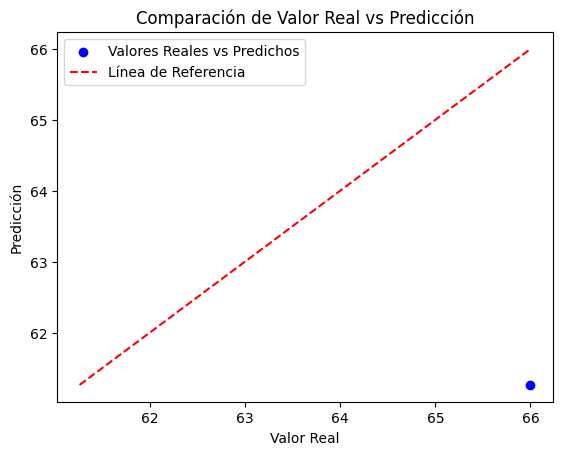

In [ ]:
import matplotlib.pyplot as plt

# Valores de entrada para la predicción
valores_entrada = [61.0, 7.0, 6.0, 1.4]

# Realizar la predicción
prediccion = modelo.predict([valores_entrada])

# Obtener el valor real correspondiente
valor_real = df_qX['Humedad3pm'][82239]

# Imprimir la predicción y el valor real
print('-----------------------------------------------------')
print("Valores de entrada:", valores_entrada)
print("Predicción:", prediccion)
print("Valor real:", valor_real)
print('-----------------------------------------------------')

# Graficar valores reales vs predichos
plt.scatter([valor_real], [prediccion], color='b', label='Valores Reales vs Predichos')
plt.plot([min(valor_real, prediccion), max(valor_real, prediccion)], [min(valor_real, prediccion), max(valor_real, prediccion)], color='red', linestyle='--', label='Línea de Referencia')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('Comparación de Valor Real vs Predicción')
plt.legend()
plt.show()


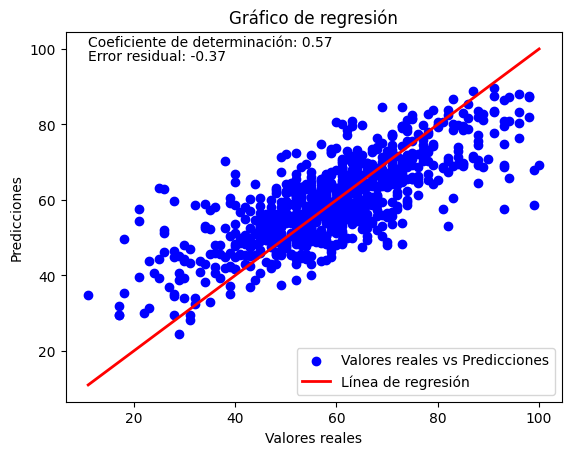

In [ ]:
# Graficar los valores reales y las predicciones
plt.scatter(y_test, y_pred, color='blue', label='Valores reales vs Predicciones')

# Graficar la línea de regresión
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Línea de regresión')

# Calcular el error residual
residuals = y_test - y_pred
mean_residual = np.mean(residuals)

plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Gráfico de regresión')

# Agregar el error residual en el gráfico
plt.text(y_test.min(), y_test.max(), f'Error residual: {mean_residual:.2f}', verticalalignment='top')

# Agregar el coeficiente de determinación en el gráfico
r2 = modelo.score(X_test, y_test)
plt.text(y_test.min(), y_test.max(), f'Coeficiente de determinación: {r2:.2f}', verticalalignment='bottom')

# Mover la leyenda a la parte inferior derecha
plt.legend(loc='lower right')

plt.show()


In [ ]:
# Regresión 2 - Sidney DATA Completa

X = df_s[['T3pm','T9am','Sol']]
y = df_s['Evaporacion']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=29)

# Creando un objeto de regresión lineal
modelo = linear_model.LinearRegression()
# Entrenar el modelo utilizando los conjuntos de entrenamiento
modelo.fit(X_train, y_train)
# Realizar predicciones utilizanod el conjunto de pruebas
y_pred = modelo.predict(X_test)
# Error cuadrático medio
print('Error cuadrático medio (MSE): %.2f'
% mean_squared_error(y_test, y_pred))
# [DATO] El coeficiente de determinación: 1 es una predicción perfecta
print('Coeficiente de determinación: %.2f'
% r2_score(y_test, y_pred))
print('Score del modelo r2: %.2f' % modelo.score(X_train,y_train))

print('-----------------------------------------------------')
print("\nPredicción:", modelo.predict([[20.9 ,	20.7 ,	0.0]]))
print("Valor real:", df_s['Evaporacion'][29497],"\n")
print('-----------------------------------------------------')

Error cuadrático medio (MSE): 4.55
Coeficiente de determinación: 0.40
Score del modelo r2: 0.38
-----------------------------------------------------

Predicción: [5.64643563]
Valor real: 6.2 

-----------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


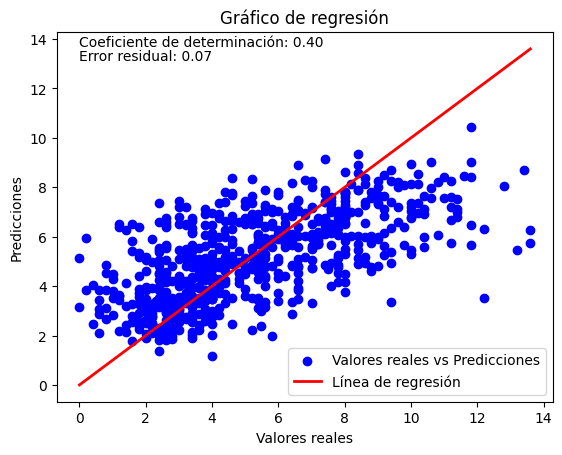

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Gráfico de puntos reales y predicciones
plt.scatter(y_test, y_pred, color='blue', label='Valores reales vs Predicciones')

# Gráfico de la línea de regresión
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Línea de regresión')

# Calcular el error residual
residuals = y_test - y_pred
mean_residual = np.mean(residuals)

plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Gráfico de regresión')

# Agregar el error residual en el gráfico
plt.text(y_test.min(), y_test.max(), f'Error residual: {mean_residual:.2f}', verticalalignment='top')

# Agregar el coeficiente de determinación en el gráfico
r2 = modelo.score(X_test, y_test)
plt.text(y_test.min(), y_test.max(), f'Coeficiente de determinación: {r2:.2f}', verticalalignment='bottom')

# Mover la leyenda a la parte inferior derecha
plt.legend(loc='lower right')

plt.show()


In [ ]:
# Preparando la DATA para los Modelos Clasificatorios

# Modelo 1 - Árbol de Decisiones
df_numQ = df_final.loc[df_weather['RegZone'] == 'Queensland']
df_numQ = df_numQ.loc[(df_numQ['Anio'] >=2010) & (df_numQ['Anio'] < 2013)] # DF Queensland años 2010 - 2012
df_numQ = df_numQ.drop(['Date', 'Location', 'GeoLocation','RegZone','WD9am','WD3pm','Dir_viento','Anio','Mes'], axis = 1)


Index(['Sol', 'Humedad9am', 'Humedad3pm', 'Riesgo', 'desc_LluviaHoy'], dtype='object')


<Axes: title={'center': 'Correlación de Pearson de las columnas'}>

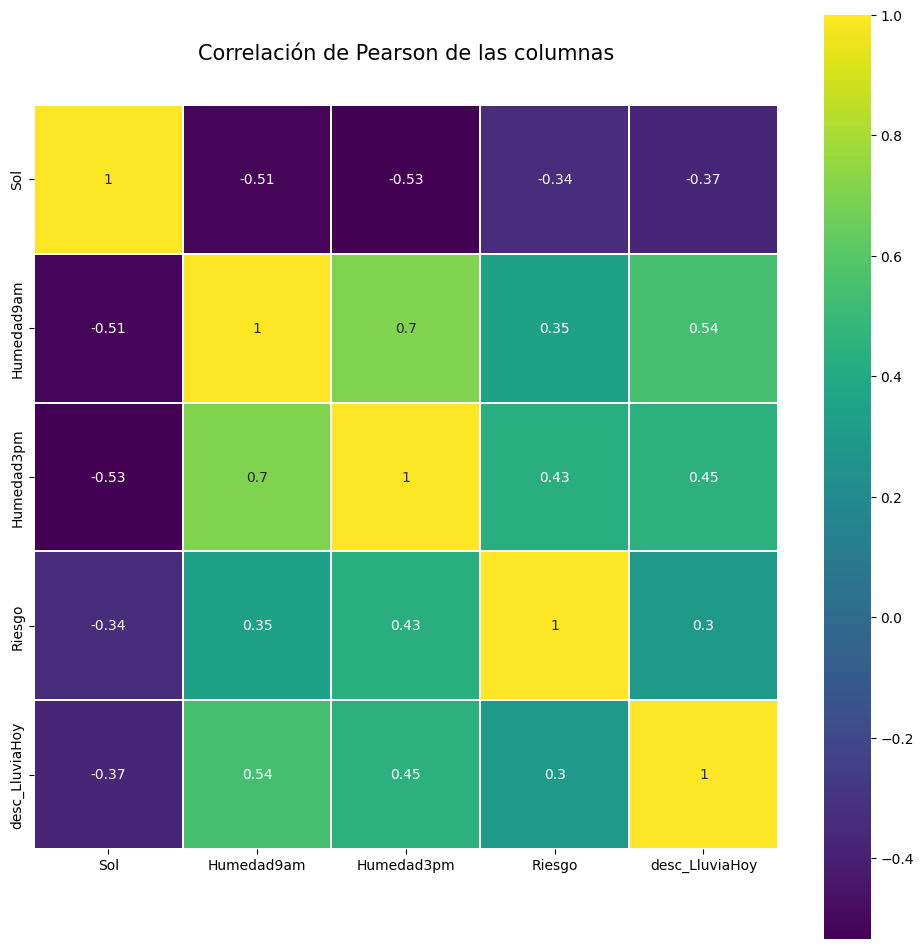

In [ ]:
# Modelos de Clasificación
# Seleccionando las 5 mejores columnas según el target
from sklearn.feature_selection import SelectKBest

X = df_numQ.drop(['desc_LluviaMan'], axis = 1) # Target = desc_LluviaMan
y = df_numQ.desc_LluviaMan

best=SelectKBest(k=5) # Se seleccionan las mejoras k columnas
X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)

print(X.columns[selected]) # Se imprimen las 5 mejores columnas

used_features =X.columns[selected] # Se utiliza el valor anteriormente obtenido X
colormap = plt.cm.viridis # Colores del mapa de correlacíon Pearson
plt.figure(figsize=(12,12)) # Dimensión de figuras
plt.title('Correlación de Pearson de las columnas', y=1.05, size=15)

sns.heatmap(df_numQ[used_features].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True) # Mapa de Calor

In [ ]:
# Creamos un df solo con las variables correlacionadas
col = ['Nub3pm', 'Humedad3pm', 'desc_LluviaHoy','desc_LluviaMan']
df_q = df_numQ[col].copy()

df_q.head(10)

,Nub3pm,Humedad3pm,desc_LluviaHoy,desc_LluviaMan
82239,7.0,66.0,1.0,0.0
82240,3.0,66.0,0.0,0.0
82241,8.0,76.0,0.0,1.0
82242,7.0,65.0,1.0,0.0
82243,7.0,56.0,0.0,0.0
82244,7.0,64.0,0.0,0.0
82245,7.0,62.0,0.0,0.0
82246,3.0,55.0,0.0,0.0
82247,3.0,48.0,0.0,0.0
82248,1.0,52.0,0.0,0.0


# Árbol de decisión de clasificación

**¿Qué es?**: Es un modelo de aprendizaje automático supervisado utilizado para realizar tareas de clasificación. Es una estructura en forma de árbol compuesta por nodos recursivos que representan decisiones, y ramas que representan posibles resultados o valores.

La idea principal es dividir recursivamente el conjunto de datos de entrenamiento en subconjuntos más pequeños y homogéneos en términos de la etiqueta de clase. Cada nodo representa una prueba o decisión sobre uno de los atributos del conjunto de datos, y las ramas representan los posibles valores que puede tomar dicho atributo. Los nodos finales, conocidos como hojas, contienen las etiquetas de clase asignadas a las muestras que llegan a ese punto.

Accuracy del modelo: 0.8341404358353511 

-----------------------------------------------------

Profundidad del árbol: 4
Número de nodos terminales: 16 

-----------------------------------------------------

Predicción: [0.]
Valor real: 0.0 

-----------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


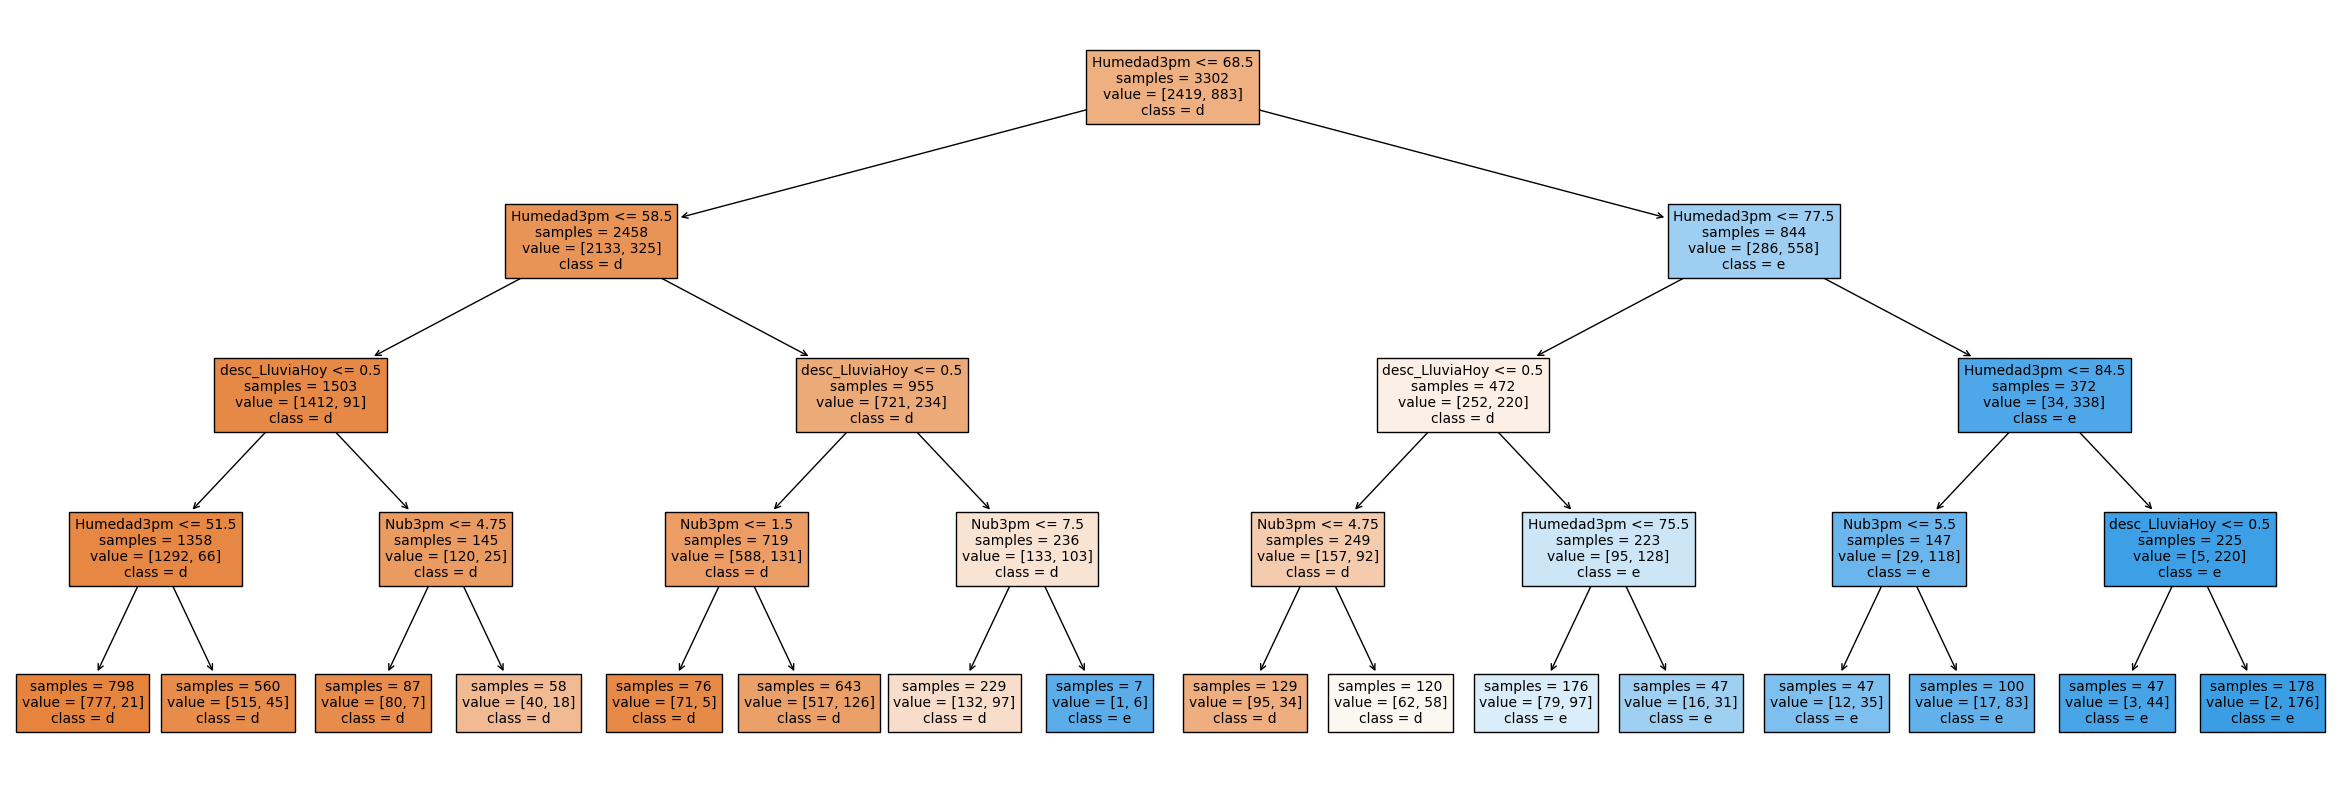

In [ ]:
# Modelo de Clasificación 1 - Árbol de Decisiones
# Queensland - Años 2010 - 2012 - Influencia de si va a llover o no en otras variables

X = df_q.drop(['desc_LluviaMan'], axis = 1) # Target = desc_LluviaMan

y = df_q.desc_LluviaMan

# Separar los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 29)

modelo = DecisionTreeClassifier(random_state=29, max_depth=4)

# Entrenamiento del modelo
modelo.fit(X_train, y_train)

# Validación del modelo
y_pred = modelo.predict(X_test)
# Evaluación del modelo

print('Accuracy del modelo:', accuracy_score(y_test, y_pred),'\n')

print('-----------------------------------------------------')

# Representación gráfica del árbol
fig, ax = plt.subplots(figsize=(30, 10))
print(f"\nProfundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}",'\n')
plot = plot_tree(
  decision_tree = modelo,
  feature_names = df_q.drop(columns = ["desc_LluviaMan"]).columns,
  class_names = 'desc_LluviaMan',
  filled = True,
  impurity = False,
  fontsize = 10,
  precision = 2,
  ax = ax)

print('-----------------------------------------------------')
print("\nPredicción:", modelo.predict([[7.0,56.0,0.0]]))
print("Valor real:", df_q['desc_LluviaMan'][82243],"\n")
print('-----------------------------------------------------')



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


AttributeError: ignored

In [ ]:
# Preparando la DATA para los Modelos Clasificatorios

# Modelo 2 - Naive Bayes
df_sidney = df_final.loc[df_weather['Location'] == 'Sydney']
df_sidney = df_sidney.drop(['Date', 'Location', 'GeoLocation','RegZone','WD9am','WD3pm','Dir_viento','Anio','Mes'], axis = 1)

col = ['Nub3pm', 'Humedad3pm', 'desc_LluviaHoy','desc_LluviaMan']

df_s = df_sidney[col].copy()


# Verificando los tipos de datos
df_s.head(10)

,Nub3pm,Humedad3pm,desc_LluviaHoy,desc_LluviaMan
29497,8.0,84.0,1.0,1.0
29498,7.0,73.0,1.0,1.0
29499,8.0,86.0,1.0,1.0
29500,8.0,90.0,1.0,1.0
29501,8.0,74.0,1.0,1.0
29502,6.0,62.0,1.0,1.0
29503,7.0,80.0,1.0,1.0
29504,8.0,61.0,1.0,1.0
29505,7.0,91.0,1.0,1.0
29506,2.0,53.0,1.0,0.0


In [ ]:
# Clasificación 2 - Naive Bayes
# Sydney DATA COMPLETA por ahora

from sklearn.naive_bayes import GaussianNB # Se define el algoritmo a utilizar: Naive Bayes, en este caso es GaussianNB
from sklearn.metrics import confusion_matrix # Evaluación del modelo
from sklearn.metrics import precision_score # Se calcula la precisión del modelo

X = df_s.drop(['desc_LluviaMan'], axis = 1) # Target = desc_LluviaMan
y = df_s.desc_LluviaMan

# Separar los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 29)
# Se define el algoritmo a utilizar Naive Bayes, en este caso es GaussianNB
modelo = GaussianNB()
# Entrenamiento del modelo
modelo.fit(X_train, y_train)
# Validación del modelo
y_pred = modelo.predict(X_test)
# Evaluación del modelo
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz,'\n')
# Se calcula la precisión del modelo
precision = precision_score(y_test, y_pred)
print('Precisión del modelo:',precision,'\n')

print('-----------------------------------------------------')
print("\nPredicción:", modelo.predict([[8.0,74.0,1.0]]))
print("Valor real:", df_s['desc_LluviaMan'][29501],"\n")
print('-----------------------------------------------------')

Matriz de Confusión:
[[455  56]
 [ 58  99]] 

Precisión del modelo: 0.6387096774193548 

-----------------------------------------------------

Predicción: [1.]
Valor real: 1.0 

-----------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


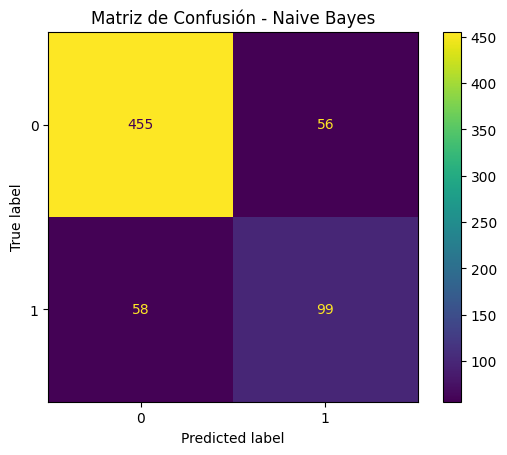

Precisión del modelo: 0.6387096774193548
-----------------------------------------------------

Predicción: [1.]
Valor real: 1.0 

-----------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score # Se calcula la precisión del modelo

X = df_s.drop(['desc_LluviaMan'], axis=1) # Variables de entrada (características)
y = df_s.desc_LluviaMan # Variable objetivo

# Separar los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

# Crear y entrenar el clasificador Naive Bayes
modelo = GaussianNB()
modelo.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Calcular la matriz de confusión
matriz = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=matriz)
disp.plot()
plt.title("Matriz de Confusión - Naive Bayes")
plt.show()

# Calcular la precisión del modelo
precision = precision_score(y_test, y_pred)
print('Precisión del modelo:', precision)

print('-----------------------------------------------------')
print("\nPredicción:", modelo.predict([[8.0, 74.0, 1.0]]))
print("Valor real:", df_s['desc_LluviaMan'][29501], "\n")
print('-----------------------------------------------------')



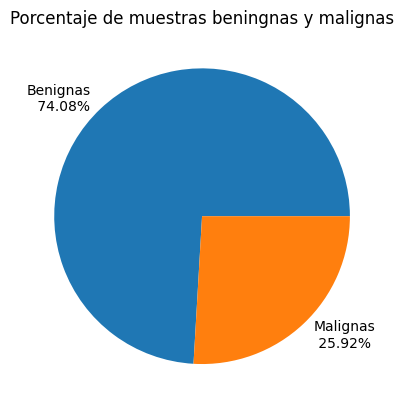

In [ ]:
import matplotlib.pyplot as plt
# Gráfico de tortas del porcentaje de muestras benignas y mañignas
# Contando las benignas
clases = np.array([df_s[df_s.desc_LluviaMan == 0.0].shape[0],df_s[df_s.desc_LluviaMan == 1.0].shape[0]])
# Creando las leyendas del grafico.
labels = [ str(round(x * 1.0 / clases.sum() * 100.0, 2)) + '%' for x in clases]
labels[0] = 'Benignas\n ' + labels[0]
labels[1] = 'Malignas\n ' + labels[1]
plt.pie(clases, labels=labels)
plt.title('Porcentaje de muestras beningnas y malignas')
plt.show()

# Interpretación de los resultados.

Desde la matriz de confusión obtenemos:
* Se obtienen 554 datos predichos correctamente
* Se obtienen 114 datos erróneos




# Estructura de la matriz de confusíon
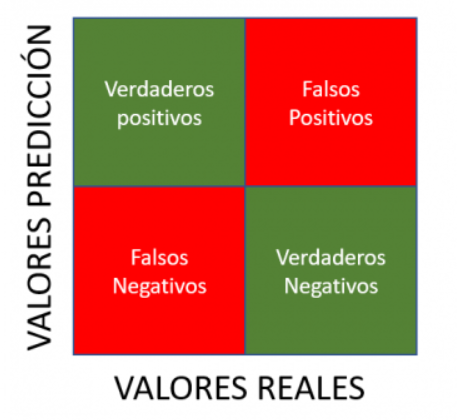

# Se aprecia que:

* Contamos con 455 datos **VERDADEROS POSITIVOS**
* Contamos con 56 datos **FALSOS POSITIVOS**
* Contamos con 58 datos **FALSOS NEGATIVOS**
* Contamos con 99 datos **VERDADEROS NEGATIVOS**

# Considerando lo anterior esto se interpreta la matriz de la siguiente forma:

* Verdaderos positivos (True Positives, TP): Representa la cantidad de casos en los que el modelo **clasificó correctamente una muestra como positiva**. En este caso, existen 455 datos clasificados correctamente como positivos.

* Falsos positivos (False Positives, FP): Representa la cantidad de casos en los que el modelo **clasificó incorrectamente una muestra como positiva cuando en realidad era negativa**. En este caso, existen 56 datos clasificados incorrectamente como positivos.

* Falsos negativos (False Negatives, FN): Representa la cantidad de casos en los que el modelo **clasificó incorrectamente una muestra como negativa cuando en realidad era positiva**. En este caso, existen 58 datos clasificados incorrectamente como negativo.

*  Verdaderos negativos (True Negatives, TN): Representa la cantidad de casos en los que el modelo **clasificó correctamente una muestra como negativa**. En este caso, existen 99 datos clasificados correctamente como negativos.